# The Battle of Neighbourhoods
#### Applied Data Science CapstoneProject
by Surya Prakash Mishra

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results](#results)
* [Discussion](#Discussion)
* [Conclusion](#Conclusion)
* [Analysis](#theCode)<br>
   : 1\. [Import Libraries](#lib)<br>
   : 2\. [Get Data](#getdata)<br>
   : 3\. [Exploring Neighbourhood Using Foursquare Api](#four)<br>
   : 4\. [Analyzing Each Location](#foursq)<br>
   : 5\. [Running K-Means Clusttering](#kmeans)


## Introduction: Business Problem <a name="introduction"></a>

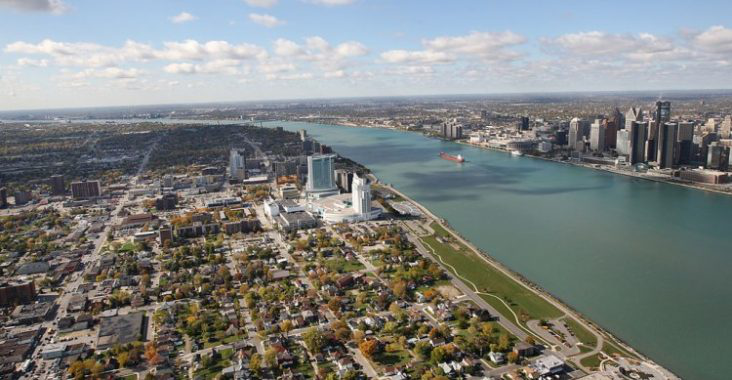

In [132]:
import requests
from PIL import Image
url = 'https://www.isanesth.org/wp-content/uploads/2017/10/Windsor-Canada-732x380.jpg'
im = Image.open(requests.get(url, stream=True).raw)
im

Windsor is a city in southwestern Ontario, Canada, on the south bank of the Detroit River directly across from Detroit, Michigan. Located in Essex County, it is the southernmost city in Canada and marks the southwestern end of the Quebec City–Windsor Corridor. The city's population was 217,188 at the 2016 census, making it the third-most populated city in Southwestern Ontario, after London and Kitchener. The Detroit–Windsor urban area is North America's most populous trans-border conurbation, and the Ambassador Bridge border crossing is the busiest commercial crossing on the Canada–United States border.

Windsor is a major contributor to Canada's automotive industry and is culturally diverse. Known as the "Automotive Capital of Canada", Windsor's industrial and manufacturing heritage is responsible for how the city has developed through the years. Owing to this virtues it offers a wide spectrum of venues and is a governement, university and cultural hub.

As the city grows and develops, it becomes increasingly important to examine and understand it quantitiatively. The City of Windsor provides open data for everyone and encourages entrepreneurial use to develop services for the benefit of its ciitzens.

Developers, policy makers and/or city planners have an interest in answering the following questions:

1) What neighbourhoods have the highest crime?

2) Is population density correlated to crime level?

3) Using Foursquare data, what venues are most common in different locations within the city?

4) Does the Knowledge Park really need a coffee shop?

5) What other landmarks and facilities can be useful?


## Data <a name="data"></a>

To understand and explore we will need the following City of Windsor Open Data:

Open Data Site: http://data-windsor.opendata.arcgis.com/

Windsor Neighbourhoods: http://data-windsor.opendata.arcgis.com/datasets/neighbourhoods--quartiers

Windsor Crime by Neighbourhood: http://data-windsor.opendata.arcgis.com/datasets/crime-by-neighbourhood-2017--crime-par-quartier-2017

Fredericton Census Tract Demographics: http://data-windsor.opendata.arcgis.com/datasets/census-tract-demographics--donn%C3%A9es-d%C3%A9mographiques-du-secteur-de-recensement

Windsor locations of interest: https://github.com/old-school-kid/Coursera_Capstone/blob/master/Windsor%20Locations.xlsx

Foursquare Developers Access to venue data: https://foursquare.com/

Using this data will allow exploration and examination to answer the questions asked above. The neighbourhood data will enable us to properly group crime by neighbourhood. The Census data will enable us to then compare the population density to examine if areas of highest crime are also most densely populated. Windsor locations of interest will then allow us to cluster and quantitatively understand the venues most common to that location.


## Methodology <a name="methodology"></a>

All steps are referenced beleow in the Appendix: Analysis section.

The methodology will include:

1) Loading each data set

2)Examine the crime frequency by neighbourhood

3) Study the crime types and then pivot analysis of crime type frequency by neighbourhood

4) Understand correlation between crimes and population density

5) Perform k-means statisical analysis on venues by locations of interest based on findings from crimes and neighbourhood

6) Determine which venues are most common statistically in the region of greatest crime count then in all other locations of interest.

7) Determine if an area, such as the Knowledge Park needs a coffee shop.

### Loading the data

After loading the applicable libraries, the referenced geojson neighbourhood data was loaded from the City of Windsor Open Data site. This dataset uses block polygon shape coordinates which are better for visualization and comparison. The City also uses Ward data but the Neighbourhood location data is more accurate and includes more details. The same type of dataset was then loaded for the population density from the Stats Canada Census tracts.

The third dataset, an excel file, "Crime by Neighbourhood 2017" downloaded from the City of Windsor Open Data site is found under the Public Safety domain. This dataset was then uploaded for the analysis. It's interesting to note the details of this dataset are aggregated by neighbourhood. It is not an exhaustive set by not including all crimes (violent offenses) nor specific location data of the crime but is referenced by neighbourhood.

This means we can gain an understanding of the crime volume by type by area but not specific enough to understand the distribution properties. Valuable questions such as, "are these crimes occuring more often in a specific area and at a certain time by a specific demographic of people?" cannot be answered nor explored due to what is reasonably assumed to be personal and private information with associated legal risks.

There is value to the city to explore the detailed crime data using data science to predict frequency, location, timing and conditions to best allocated resources for the benefit of its citizens and it's police force. However, human behaviour is complex requiring thick profile data by individual and the conditions surrounding the event(s). To be sufficient for reliable future prediction it would need to demonstrate validity, currency, reliability and sufficiency.



### Exploring the data
Exploring the count of crimes by neighbourhood gives us the first glimpse into the distribution.

One note is the possibility neighbourhoods names could change at different times. The crime dataset did not mention which specific neighbourhood naming dataset it was using but we assumed the neighbourhood data provided aligned with the neighbourhoods used in the crime data. It may be beneficial for the City to note and timestamp neighbourhood naming in the future or simply reference with neighbourhood naming file it used for the crime dataset.

An example of data errors: There was an error found in the naming of the neighbourhood "Platt". The neighbourhood data stated "Plat" while the crime data stated "Platt". Given the crime dataset was most simple to manipulate it was modified to "Plat". The true name of the neighbourhood is "Platt".

### First Visualization of Crime
Once the data was prepared, a choropleth map was created to view the crime count by neighbourhood. As expected the region of greatest crime count was found in the downtown and Platt neighbourhoods.

Examining the crime types enables us to learn the most frequent occuring crimes which we then plot as a bar chart to see most frequenty type.

Theft from motor vehicles is most prevalent in the same area as the most frequent crimes. It's interesting to note this area is mostly residential and most do not have garages. It would be interesting to further examine if surveillance is a deterant for motor vehicle crimes in the downtown core compared to low surveillance in the Platt neighbourhood.


##### Examining 2nd most common crime given it is specific: theft from vehicles
After exploring the pivot table showing Crime_Type by Neighbourhood, we drill into a specific type of crime, theft from vehicles and plot the choropleth map to see which area has the greatest frequency.

Again, the Platt neighbourhood appears as the most frequent.

Is this due to population density?

##### Introducing the Census data to explore the correlation between crime frequency and population density.
Visualising the population density enables us to determine that the Platt neighbourhood has lower correlation to crime frequency than I would have expected.

It would be interesting to further study the Census data and if this captures the population that is renting or more temporary/transient poplution, given the City is a University hub.

### Look at specific locations to understand the connection to venues using Foursquare data
Loading the "Windsor Locations" data enables us to perform a statistical analysis on the most common venues by location.

We might wonder if the prevalence of bars and clubs in the downtown region has something to do with the higher crime rate in the near Platt region.

Plotting the latitude and longitude coordinates of the locations of interest onto the crime choropleth map enables us to now study the most common venues by using the Foursquare data.

#### Analysing each Location
Grouping rows by location and the mean of the frequency of occurance of each category we venue categories we study the top five most common venues.

Putting this data into a pandas dataframe we can then determine the most common venues by location and plot onto a map


## Results <a name="results"></a>

The analysis helped us discover visually and quantitatively
Neighbourhoods in Fredericton

1) Crime freqency by neighbourhood

2) Crime type frequency and statistics. The mean crime count in the City of Fredericton is 22.

3) Crime type count by neighbourhood.
Theft from motor vehicles is most prevalent in the same area as the most frequent crimes. It's interesting to note this area is mostly residential and most do not have garages. It would be interesting to further examine if surveillance is a deterant for motor vehicle crimes in the downtown core compared to low surveillance in the Platt neighbourhood.

4) **Motor Vehicle crimes less than $5000 analysis*** by neighbourhood and resulting statistics.
The most common crime is Other Theft less than 5k followed by Motor Vehicle Theft less than 5k. There is a mean of 6 motor vehicle thefts less than 5k by neighbourhood in the City.

5) That population density and resulting visual correlation is not strongly correlated to crime frequency. Causation for crime is not able to be determined given lack of open data specificity by individual and environment.

6) Using ***k-means***, we were able to determine the top 10 most common venues within a 1 km radius of the centroid of the highest crime neighbourhood. The most common venues in the highest crime neighbourhood are coffee shops followed by Pubs and Bars.

7) While, it is not valid, consistent, reliable or sufficient to assume a higher concentration of the combination of coffee shops, bars and clubs predicts the amount of crime occurance in the City of Fredericton, this may be a part of the model needed to be able to in the future.

8) We were able to determine the top 10 most common venues by location of interest.

9) Statisically, we determined there are no coffee shops within the Knowledge Park clusters.


## Discussion and Recommendations <a name="Discussion"></a>

The City of Windsor Open Data enables us to gain an understanding of the crime volume by type by area but not specific enough to understand the distribution properties. Valuable questions such as, "are these crimes occuring more often in a specific area and at a certain time by a specific demographic of people?" cannot be answered nor explored due to what is reasonably assumed to be personal and private information with associated legal risks.

There is value to the city to explore the detailed crime data using data science to predict frequency, location, timing and conditions to best allocated resources for the benefit of its citizens and it's police force. However, human behaviour is complex requiring thick profile data by individual and the conditions surrounding the event(s). To be sufficient for reliable future prediction it would need to demonstrate validity, currency, reliability and sufficiency.

Errors exist in the current open data. An error was found in the naming of the neighbourhood "Platt". The neighbourhood data stated "Plat" while the crime data stated "Platt". Given the crime dataset was most simple to manipulate it was modified to "Plat". The true name of the neighbourhood is "Platt".

Theft from motor vehicles is most prevalent in the same area as the most frequent crimes. It is interesting to note this area is mostly residential and most do not have garages. It would be interesting to further examine if surveillance is a deterant for motor vehicle crimes in the downtown core compared to low surveillance in the Platt neighbourhood.

It would be interesting to further study the Census data and if this captures the population that is renting or more temporary/transient poplution, given the City is a University hub.

Given the findings of the top 10 most frequent venues by locations of interest, the Knowledge Park does not have Coffee Shops in the top 10 most common venues as determined from the Foursquare dataset. Given this area has the greatest concentration of stores and shops as venues, it would be safe to assume a coffee shop would be beneficial to the business community and the citizens of Fredericton.


## Conclusion <a name="Conclusion"></a>

Using a combination of datasets from the City of Windsor Open Data project and Foursquare venue data we were able to analyse, discover and describe neighbhourhoods, crime, population density and statistically describe quantitatively venues by locations of interest.

While overall, the City of Windsor Open Data is interesting, it misses the details required for true valued quantitiatve analysis and predictive analytics which would be most valued by investors and developers to make appropriate investments and to minimize risk.

The Open Data project is a great start and empowers the need for a "Citizens Like Me" model to be developed where citizens of digital Windsor are able to share their data as they wish for detailed analysis that enables the creation of valued services.

## APPENDIX: Analysis <a name="theCode"></a>

### Import Libraries <a name="lib"></a>

In [1]:
#load libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm  # Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans # import k-means for clustering stage

from bs4 import BeautifulSoup # for webscraping import Beautiful Soup 

import xml

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Import Data <a name="getdata"></a>

In [7]:
r = requests.get('https://opendata.arcgis.com/datasets/823d86e17a6d47808c6e4f1c2dd97928_0.geojson')
fredericton_geo = r.json()

In [8]:
neighborhoods_data = fredericton_geo['features']

In [10]:
g = requests.get('https://opendata.arcgis.com/datasets/6179d35eacb144a5b5fdcc869f86dfb5_0.geojson')
demog_geo = g.json()
demog_data = demog_geo['features']

In [3]:
crime_data= pd.read_excel('Windsor_Crime_Data.xlsx')
crime_data.head()

Unnamed: 0             Neighbourhood  Count
0           0             Barkers Point     47
1           1                 Brookside     54
2           2         Brookside Estates      9
3           3  Brookside Mini Home Park      5
4           4              College Hill     41

<function matplotlib.pyplot.show(*args, **kw)>

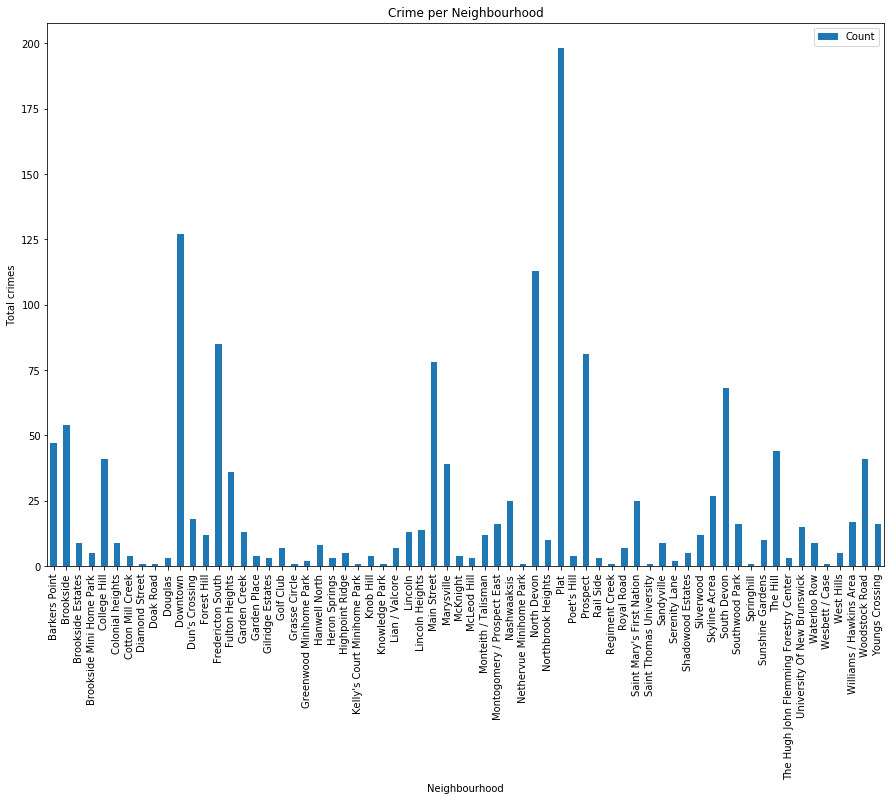

In [8]:

crime_data.plot(kind='bar', x ='Neighbourhood', y= 'Count', figsize=(30,20))
plt.title("Crime per Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Total crimes")
plt.show


In [16]:
crime_data.rename(index=str, columns={'Neighbourhood':'Neighbourh','Count':'Crime_Count'}, inplace=True)
crime_data.rename({'Platt': 'Plat'},inplace=True)
crime_data.rename(index=str, columns={'Neighbourhood':'Neighbourh','Count':'Crime_Count'}, inplace=True)

In [19]:
address = 'Windsor, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Windsor, Ontario is {}, {}.'.format(latitude, longitude))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Windsor, Ontario is 42.317099, -83.0353434.


In [134]:
world_geo = r'world_countries.json' # geojson file

windsor_1_map = folium.Map(location=[42.317099, -83.0353434], width=1000, height=750,zoom_start=11)

windsor_1_map

In [27]:
world_geo = r'world_countries.json' # geojson file

windsor_c_map = folium.Map(location=[45.91, -66.65], width=1000, height=750,zoom_start=12)


In [133]:
windsor_geo = r.json()

threshold_scale = np.linspace(crime_data['Crime_Count'].min(),crime_data['Crime_Count'].max(), 6,dtype=int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1]+1

windsor_c_map.choropleth(geo_data=windsor_geo, data=crime_data,columns=['Neighbourh', 'Crime_Count'],
    key_on='feature.properties.Neighbourh', threshold_scale=threshold_scale,fill_color='YlOrRd', fill_opacity=0.7, 
    line_opacity=0.1, legend_name='Fredericton Neighbourhoods')

windsor_c_map

D:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [97]:
location_df= pd.read_excel('Windsor Locations.xlsx')
location_df.head(15)


Location  Latitude  Longitude
0            Ambassador Bridge   42.3072   -83.0711
1           Windsor Riverfront   42.3202   -83.0387
2                 Peche Island   42.3455   -82.9278
3            Coventry Islands    42.3294   -82.9791
4             Sand Point Beach   42.3379   -82.9183
5        University of Windsor   42.3043   -83.0660
6         Saint Claire College   42.2485   -83.0203
7  Devenwood Conservation Area   42.2644   -82.9803
8                 Jackson Park   42.2951   -83.0227
9        Little River Corridor   42.3243   -82.9246

In [125]:
for lat, lng, point in zip(location_df['Latitude'], location_df['Longitude'], location_df['Location']):
    label = '{}'.format(point)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radium=1,popup=label,color='blue',fill=True,fill_color='#3186cc',fill_opacity=0.7,
        parse_html=False).add_to(windsor_1_map)
    folium.Marker([lat, lng], popup=point).add_to(windsor_1_map)
windsor_1_map

### Exploring neighbourhood using Foursquare API <a name="four"></a>

In [129]:
CLIENT_ID = '***********4O15XL4QPIDHKIA************' # your Foursquare ID
CLIENT_SECRET = '*************VKC11VI0PT3IFNRO1*********' # your Foursquare Secret
VERSION = '20181201' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ***********4O15XL4QPIDHKIA************
CLIENT_SECRET:*************VKC11VI0PT3IFNRO1*********


In [100]:
#get nearby areas of intersts
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'        
                   ]
    
    return(nearby_venues)

In [101]:
winsdor_data_venues = getNearbyVenues(names=location_df['Location'],
                                   latitudes=location_df['Latitude'],
                                   longitudes=location_df['Longitude']
                                  )


Ambassador Bridge
Windsor Riverfront
Peche Island
Coventry Islands 
Sand Point Beach
University of Windsor
Saint Claire College
Devenwood Conservation Area
Jackson Park
Little River Corridor


In [103]:
print('There are {} unique venue categories.'.format(len(winsdor_data_venues['Venue Category'].unique())))
print('There are {} unique venues.'.format(len(winsdor_data_venues['Venue id'].unique())))

There are 100 unique venue categories.
There are 218 unique venues.


In [104]:
univen = winsdor_data_venues.groupby('Location').nunique('Venue Category')
univen

Location  Location Latitude  Location Longitude  \
Location                                                                       
Ambassador Bridge                   1                  1                   1   
Coventry Islands                    1                  1                   1   
Devenwood Conservation Area         1                  1                   1   
Jackson Park                        1                  1                   1   
Little River Corridor               1                  1                   1   
Peche Island                        1                  1                   1   
Saint Claire College                1                  1                   1   
Sand Point Beach                    1                  1                   1   
University of Windsor               1                  1                   1   
Windsor Riverfront                  1                  1                   1   

                             Venue  Venue id  Venue Latitude  Venue Longitude  \
Location                                                                        
Ambassador Bridge               33        34              34               34   
Coventry Islands                23        23              23               23   
Devenwood Conservation Area     14        15              15               15   
Jackson Park                    27        27              27               27   
Little River Corridor            6         6               6                6   
Peche Island                     4         4               4                4   
Saint Claire College             7         7               7                7   
Sand Point Beach                 6         6               6                6   
University of Windsor           38        40              40               40   
Windsor Riverfront              88        89              89               89   

                             Venue Category  
Location                                     
Ambassador Bridge                        24  
Coventry Islands                         21  
Devenwood Conservation Area              13  
Jackson Park                             24  
Little River Corridor                     6  
Peche Island                              3  
Saint Claire College                      5  
Sand Point Beach                          5  
University of Windsor                    26  
Windsor Riverfront                       57

### Analyzing each Location <a name="foursq"></a>

In [105]:
freddy_onehot = pd.get_dummies(winsdor_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
freddy_onehot['Location'] = winsdor_data_venues['Location'] 

# move neighbourhood column to the first column
fixed_columns = [freddy_onehot.columns[-1]] + list(freddy_onehot.columns[:-1])
freddy_onehot = freddy_onehot[fixed_columns]

freddy_onehot.head()

Location  African Restaurant  American Restaurant  Aquarium  \
0  Ambassador Bridge                   0                    0         0   
1  Ambassador Bridge                   0                    0         0   
2  Ambassador Bridge                   0                    0         0   
3  Ambassador Bridge                   0                    0         0   
4  Ambassador Bridge                   0                    0         0   

   Art Gallery  Asian Restaurant  Athletics & Sports  Bakery  Bank  Bar  \
0            0                 0                   0       0     0    0   
1            0                 0                   0       0     0    0   
2            0                 0                   0       0     0    0   
3            0                 0                   0       0     0    1   
4            0                 0                   0       0     0    0   

   Beach  Beer Garden  Beer Store  Boat or Ferry  Bookstore  Border Crossing  \
0      0            0           0              0          0                0   
1      0            0           0              0          0                0   
2      0            0           0              0          0                0   
3      0            0           0              0          0                0   
4      0            1           0              0          0                0   

   Bowling Alley  Breakfast Spot  Brewery  Burger Joint  Business Service  \
0              0               0        0             0                 0   
1              0               0        0             0                 0   
2              0               0        0             0                 0   
3              0               0        0             0                 0   
4              0               0        0             0                 0   

   Cafeteria  Café  Casino  Chinese Restaurant  Coffee Shop  Concert Hall  \
0          0     0       0                   0            1             0   
1          0     0       0                   0            0             0   
2          0     0       0                   0            0             0   
3          0     0       0                   0            0             0   
4          0     0       0                   0            0             0   

   Construction & Landscaping  Convenience Store  Deli / Bodega  \
0                           0                  0              0   
1                           0                  0              0   
2                           0                  0              0   
3                           0                  0              0   
4                           0                  0              0   

   Department Store  Discount Store  Duty-free Shop  Electronics Store  \
0                 0               0               0                  0   
1                 0               0               0                  0   
2                 0               0               0                  0   
3                 0               0               0                  0   
4                 0               0               0                  0   

   English Restaurant  Ethiopian Restaurant  Farmers Market  \
0                   0                     0               0   
1                   0                     0               0   
2                   0                     0               0   
3                   0                     0               0   
4                   0                     0               0   

   Fast Food Restaurant  Food  Food Truck  Furniture / Home Store  Garden  \
0                     0     0           0                       0       0   
1                     0     0           0                       0       0   
2                     0     0           0                       0       0   
3                     0     0           0                       0       0   
4                     0     0           0                       0       0   

   Gas Statio

In [106]:
freddy_grouped = freddy_onehot.groupby('Location').mean().reset_index() #Group rows by location and by the mean of the frequency of occurrence of each category
freddy_grouped

Location  African Restaurant  American Restaurant  \
0            Ambassador Bridge               0.000             0.029412   
1            Coventry Islands                0.000             0.000000   
2  Devenwood Conservation Area               0.000             0.066667   
3                 Jackson Park               0.000             0.037037   
4        Little River Corridor               0.000             0.000000   
5                 Peche Island               0.000             0.000000   
6         Saint Claire College               0.000             0.000000   
7             Sand Point Beach               0.000             0.000000   
8        University of Windsor               0.025             0.025000   
9           Windsor Riverfront               0.000             0.000000   

   Aquarium  Art Gallery  Asian Restaurant  Athletics & Sports    Bakery  \
0  0.000000     0.000000          0.058824            0.000000  0.000000   
1  0.043478     0.000000          0.000000            0.000000  0.000000   
2  0.000000     0.000000          0.000000            0.000000  0.000000   
3  0.000000     0.000000          0.000000            0.000000  0.000000   
4  0.000000     0.000000          0.000000            0.000000  0.000000   
5  0.000000     0.000000          0.000000            0.000000  0.000000   
6  0.000000     0.000000          0.000000            0.000000  0.000000   
7  0.000000     0.000000          0.000000            0.166667  0.000000   
8  0.000000     0.000000          0.050000            0.000000  0.000000   
9  0.000000     0.011236          0.000000            0.011236  0.011236   

       Bank       Bar     Beach  Beer Garden  Beer Store  Boat or Ferry  \
0  0.029412  0.029412  0.000000     0.029412    0.000000       0.000000   
1  0.043478  0.000000  0.000000     0.000000    0.043478       0.000000   
2  0.000000  0.000000  0.000000     0.000000    0.000000       0.000000   
3  0.000000  0.000000  0.000000     0.000000    0.000000       0.000000   
4  0.000000  0.000000  0.000000     0.000000    0.000000       0.000000   
5  0.000000  0.000000  0.000000     0.000000    0.000000       0.000000   
6  0.000000  0.000000  0.000000     0.000000    0.000000       0.000000   
7  0.000000  0.000000  0.166667     0.000000    0.000000       0.000000   
8  0.025000  0.025000  0.000000     0.025000    0.025000       0.000000   
9  0.011236  0.067416  0.000000     0.000000    0.011236       0.011236   

   Bookstore  Border Crossing  Bowling Alley  Breakfast Spot   Brewery  \
0   0.000000         0.029412       0.000000        0.000000  0.000000   
1   0.000000         0.000000       0.043478        0.043478  0.000000   
2   0.000000         0.000000       0.000000        0.000000  0.000000   
3   0.000000         0.000000       0.037037        0.037037  0.000000   
4   0.000000         0.000000       0.000000        0.000000  0.000000   
5   0.000000         0.000000       0.000000        0.000000  0.000000   
6   0.000000         0.000000       0.000000        0.000000  0.000000   
7   0.000000         0.000000       0.000000        0.000000  0.000000   
8   0.000000         0.000000       0.000000        0.000000  0.000000   
9   0.011236         0.000000       0.000000        0.011236  0.011236   

   Burger Joint  Business Service  Cafeteria      Café    Casino  \
0      0.000000          0.000000   0.000000  0.000000  0.000000   
1      0.000000          0.043478   0.000000  0.000000  0.000000   
2      0.000000          0.000000   0.000000  0.000000  0.000000   
3      0.000000          0.037037   0.000000  0.000000  0.000000   
4      0.000000          0.000000   0.000000  0.000000  0.000000   
5      0.000000          0.000000   0.000000  0.000000  0.000000   
6      0.000000          0.000000   0.000000  0.000000  0.000000   
7      0.000000          0.000000   0.000000  0.000000  0.000000   
8      0.000000          0.000000   0.000000  0.000000  0.000000   
9      0.033708          0.011236   0.

In [107]:
## print top 6 most common venues in each location
num_top_venues = 6

for hood in freddy_grouped['Location']:
    print("----"+hood+"----")
    temp = freddy_grouped[freddy_grouped['Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ambassador Bridge----
               venue  freq
0        Pizza Place  0.09
1  Convenience Store  0.09
2        Coffee Shop  0.09
3   Asian Restaurant  0.06
4                Pub  0.06
5         Restaurant  0.06


----Coventry Islands ----
                  venue  freq
0                Garden  0.09
1                Museum  0.09
2   Sporting Goods Shop  0.04
3         Bowling Alley  0.04
4                 Plaza  0.04
5  Fast Food Restaurant  0.04


----Devenwood Conservation Area----
                           venue  freq
0                          Hotel  0.13
1         Furniture / Home Store  0.13
2                 Ice Cream Shop  0.07
3                    Gas Station  0.07
4  Paper / Office Supplies Store  0.07
5                    Coffee Shop  0.07


----Jackson Park----
                  venue  freq
0              Pharmacy  0.07
1  Fast Food Restaurant  0.07
2  Gym / Fitness Center  0.07
3             Pet Store  0.04
4                   Gym  0.04
5           Coffee Shop  0.04


-

### Store the data in a new pandas dataframe

In [108]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [109]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
location_venues_sorted = pd.DataFrame(columns=columns)
location_venues_sorted['Location'] = freddy_grouped['Location']

for ind in np.arange(freddy_grouped.shape[0]):
    location_venues_sorted.iloc[ind, 1:] = return_most_common_venues(freddy_grouped.iloc[ind, :], num_top_venues)


In [110]:
location_venues_sorted

Location   1st Most Common Venue  \
0            Ambassador Bridge             Coffee Shop   
1            Coventry Islands                   Garden   
2  Devenwood Conservation Area  Furniture / Home Store   
3                 Jackson Park                Pharmacy   
4        Little River Corridor             Coffee Shop   
5                 Peche Island         Harbor / Marina   
6         Saint Claire College            Home Service   
7             Sand Point Beach                   Trail   
8        University of Windsor             Pizza Place   
9           Windsor Riverfront                     Bar   

        2nd Most Common Venue          3rd Most Common Venue  \
0                 Pizza Place              Convenience Store   
1                      Museum                Harbor / Marina   
2                       Hotel  Paper / Office Supplies Store   
3        Gym / Fitness Center           Fast Food Restaurant   
4                        Park          General Entertainment   
5                       Trail             Seafood Restaurant   
6  Construction & Landscaping                    Pizza Place   
7              Ice Cream Shop             Athletics & Sports   
8           Convenience Store                    Coffee Shop   
9                       Hotel                    Coffee Shop   

  4th Most Common Venue       5th Most Common Venue  \
0            Restaurant            Asian Restaurant   
1        Sandwich Place                  Food Truck   
2        Ice Cream Shop         Rental Car Location   
3      Business Service           Convenience Store   
4        Knitting Store                    Gym Pool   
5        Farmers Market  Construction & Landscaping   
6                   Pub                 Coffee Shop   
7                 Beach          Seafood Restaurant   
8      Asian Restaurant                    Tea Room   
9                  Café                      Lounge   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                       Park                   Pub        Sandwich Place   
1       Fast Food Restaurant    English Restaurant    Mexican Restaurant   
2             Discount Store      Department Store    Miscellaneous Shop   
3                Pizza Place             Pet Store                  Park   
4                      Trail           Art Gallery                  Food   
5          Convenience Store         Deli / Bodega      Department Store   
6                 Whisky Bar  Ethiopian Restaurant     Convenience Store   
7                 Whisky Bar  Fast Food Restaurant     Convenience Store   
8  Middle Eastern Restaurant            Restaurant                   Pub   
9         Italian Restaurant          Burger Joint            Restaurant   

       9th Most Common Venue     10th Most Common Venue  
0  Middle Eastern Restaurant             Duty-free Shop  
1                Coffee Shop              Grocery Store  
2             Sandwich Place               Home Service  
3                Coffee Shop  Middle Eastern Restaurant  
4              Deli / Bodega           Department Store  
5             Discount Store             Duty-free Shop  
6              Deli / Bodega           Department Store  
7              Deli / Bodega           Department Store  
8       Fast Food Restaurant        Japanese Restaurant  
9  Middle Eastern Restaurant          Outdoor Sculpture

## Cluster the locations of Windsor <a name="kmeans"></a>

In [111]:
# running Kmeans clusttering
kclusters = 5

freddy_grouped_clustering = freddy_grouped.drop('Location', 1)
#print(freddy_grouped_clustering.head())

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(freddy_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 4, 2, 1, 3, 0, 0])

#### Now merge the dataframes

In [112]:
freddy_merged = location_df
print(freddy_merged.shape)
print(kmeans.labels_.shape)

# add clustering labels
freddy_merged['Cluster Labels'] = kmeans.labels_

# merge fredericton_grouped with location df to add latitude/longitude for each location
freddy_merged = freddy_merged.join(location_venues_sorted.set_index('Location'), on='Location')

freddy_merged# check the last columns!

(10, 3)
(10,)


Location  Latitude  Longitude  Cluster Labels  \
0            Ambassador Bridge   42.3072   -83.0711               0   
1           Windsor Riverfront   42.3202   -83.0387               0   
2                 Peche Island   42.3455   -82.9278               0   
3            Coventry Islands    42.3294   -82.9791               0   
4             Sand Point Beach   42.3379   -82.9183               4   
5        University of Windsor   42.3043   -83.0660               2   
6         Saint Claire College   42.2485   -83.0203               1   
7  Devenwood Conservation Area   42.2644   -82.9803               3   
8                 Jackson Park   42.2951   -83.0227               0   
9        Little River Corridor   42.3243   -82.9246               0   

    1st Most Common Venue       2nd Most Common Venue  \
0             Coffee Shop                 Pizza Place   
1                     Bar                       Hotel   
2         Harbor / Marina                       Trail   
3                  Garden                      Museum   
4                   Trail              Ice Cream Shop   
5             Pizza Place           Convenience Store   
6            Home Service  Construction & Landscaping   
7  Furniture / Home Store                       Hotel   
8                Pharmacy        Gym / Fitness Center   
9             Coffee Shop                        Park   

           3rd Most Common Venue 4th Most Common Venue  \
0              Convenience Store            Restaurant   
1                    Coffee Shop                  Café   
2             Seafood Restaurant        Farmers Market   
3                Harbor / Marina        Sandwich Place   
4             Athletics & Sports                 Beach   
5                    Coffee Shop      Asian Restaurant   
6                    Pizza Place                   Pub   
7  Paper / Office Supplies Store        Ice Cream Shop   
8           Fast Food Restaurant      Business Service   
9          General Entertainment        Knitting Store   

        5th Most Common Venue      6th Most Common Venue  \
0            Asian Restaurant                       Park   
1                      Lounge         Italian Restaurant   
2  Construction & Landscaping          Convenience Store   
3                  Food Truck       Fast Food Restaurant   
4          Seafood Restaurant                 Whisky Bar   
5                    Tea Room  Middle Eastern Restaurant   
6                 Coffee Shop                 Whisky Bar   
7         Rental Car Location             Discount Store   
8           Convenience Store                Pizza Place   
9                    Gym Pool                      Trail   

  7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
0                   Pub        Sandwich Place  Middle Eastern Restaurant   
1          Burger Joint            Restaurant  Middle Eastern Restaurant   
2         Deli / Bodega      Department Store             Discount Store   
3    English Restaurant    Mexican Restaurant                Coffee Shop   
4  Fast Food Restaurant     Convenience Store              Deli / Bodega   
5            Restaurant                   Pub       Fast Food Restaurant   
6  Ethiopian Restaurant     Convenience Store              Deli / Bodega   
7      Department Store    Miscellaneous Shop             Sandwich Place   
8             Pet Store                  Park                Coffee Shop   
9           Art Gallery                  Food              Deli / Bodega   

      10th Most Common Venue  
0             Duty-free Shop  
1          Outdoor Sculpture  
2             Duty-free Shop  
3              Grocery Store  
4           Department Store  
5        Japanese Restaurant  
6           Department Store  
7               Home Service  
8  Middle Eastern Restaurant  
9           Department Store

In [127]:
def color(ele): 
    if (ele==0): 
        col = 'green'
    elif (ele==1): 
        col = 'blue'
    elif (ele==2): 
        col = 'orange'
    elif (ele==3):
        col = 'purple'
    elif (ele==4):
        col = 'beige'
    else: 
        col='red'
    return col

In [128]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(freddy_merged['Latitude'], freddy_merged['Longitude'], freddy_merged['Location'], freddy_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=5,popup=label,color=color(cluster),fill=True,fill_color=color(cluster),
        fill_opacity=0.7).add_to(map_clusters)
    folium.Marker([lat, lon], popup=poi,icon=folium.Icon(color=color(cluster),icon='info-sign')).add_to(map_clusters)
map_clusters

#### End to the Project
## Thank You